In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [3]:
train=pd.read_csv('input/train.csv')
test=pd.read_csv('input/test.csv')

In [4]:

# Lưu lại các thông tin cần thiết
train_labels = train['Survived']
test_ids = test['PassengerId']

In [5]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


# Data Cleaning

In [6]:
test.info(),train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass  

(None, None)

In [7]:
train.sample(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
573,574,1,3,"Kelly, Miss. Mary",female,NaN,0,0,14312,7.7500,NaN,Q
625,626,0,1,"Sutton, Mr. Frederick",male,61.0,0,0,36963,32.3208,D50,S
685,686,0,2,"Laroche, Mr. Joseph Philippe Lemercier",male,25.0,1,2,SC/Paris 2123,41.5792,NaN,C
794,795,0,3,"Dantcheff, Mr. Ristiu",male,25.0,0,0,349203,7.8958,NaN,S
744,745,1,3,"Stranden, Mr. Juho",male,31.0,0,0,STON/O 2. 3101288,7.9250,NaN,S
777,778,1,3,"Emanuel, Miss. Virginia Ethel",female,5.0,0,0,364516,12.4750,NaN,S
591,592,1,1,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",female,52.0,1,0,36947,78.2667,D20,C
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0000,NaN,S
73,74,0,3,"Chronopoulos, Mr. Apostolos",male,26.0,1,0,2680,14.4542,NaN,C
453,454,1,1,"Goldenberg, Mr. Samuel L",male,49.0,1,0,17453,89.1042,C92,C


<h3 style="background-color: #111; padding: 15px; font: bold 22px arial; color: lightgreen; border: 2px solid lime; border-radius: 8px">
♠ Handling Null Values  🚢</h3>

**The 'Cabin' column contains numerous null values, so we will drop it.**



In [8]:
train['Deck']=train['Cabin'].str[0].fillna('U')




In [9]:
train.isnull().sum()
print(train.shape)

(891, 13)


In [10]:
test.isnull().sum()
print(test.shape)

(418, 11)


In [11]:
most_common_embarked = train['Embarked'].mode()[0]
train['Embarked'] = train['Embarked'].fillna(most_common_embarked)

Thay thế (điền) tất cả các giá trị thiếu (NaN) trong cột Embarked của DataFrame train bằng ký tự 'S'.

In [12]:
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

do trong test có 1 tk ở Fare là thiếu dữ liệu, nên ta dùng mean để tính là chính xác nhất

In [13]:
print(train.shape, test.shape)

(891, 13) (418, 11)


<h3 style="background-color: #111; padding: 15px; font: bold 22px arial; color: lightgreen; border: 2px solid lime; border-radius: 8px">
♠ Creating a Unified DataFrame for Easier Manipulation 🧑‍💻</h3>


In [14]:
df=pd.concat([train,test],sort=True).reset_index(drop=True)

tổng số cột là hợp nhất của tất cả các cột xuất hiện ở cả hai bảng.

In [15]:
df.shape

(1309, 13)

In [16]:
df.head()

,Age,Cabin,Deck,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,U,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,U,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,C,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,U,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [17]:
#df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})


In [18]:
df.corr(numeric_only=True)['Age'].abs()

Age            1.000000
Fare           0.178314
Parch          0.150917
PassengerId    0.028814
Pclass         0.408106
SibSp          0.243699
Survived       0.077221
Name: Age, dtype: float64

age kh quyeets dinhk


In [19]:
df_Age_mean=df.groupby(['Sex', 'Pclass']).median(numeric_only=True)['Age']
df_Age_mean

Sex     Pclass
female  1         36.0
        2         28.0
        3         22.0
male    1         42.0
        2         29.5
        3         25.0
Name: Age, dtype: float64

Giới tính (Sex):

Nữ thường có tuổi khác trung bình so với nam trên tàu.

Ví dụ: nhiều phụ nữ trẻ, nam có thể lớn tuổi hơn → nếu nhóm chung, giá trị trung bình sẽ sai lệch.

Hạng vé (Pclass):

Pclass = 1 (hạng sang) thường là người lớn tuổi, có điều kiện.

Pclass = 3 (hạng phổ thông) thường là người trẻ hoặc lao động.
→ Tuổi phụ thuộc khá rõ vào hạng vé.

Kết hợp hai yếu tố này, bạn có thể điền tuổi chính xác hơn, giảm sai lệch → giúp mô hình tăng accuracy.

tuổi trung vị của từng nhóm kết hợp giữa giới tính và hạng vé (ví dụ: Nam-hạng 1, Nữ-hạng 3,...).

sắp xếp, lấy (n+1)/2= vị trí trung vị

In [20]:
#df['Age']=df.groupby(['Sex','Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

điền giá trị thiếu (NaN) trong cột Age bằng tuổi trung vị của từng nhóm kết hợp giữa Sex (giới tính) và Pclass (hạng vé):

In [21]:
df.isnull().sum()

Age             263
Cabin          1014
Deck            418
Embarked          0
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

<h3 style="background-color: #111; padding: 15px; font: bold 22px arial; color: lightgreen; border: 2px solid lime; border-radius: 8px">
♠ Extracting Titles from Names and Adding as a Separate Column 📜</h3>


In [22]:
df['Title']=df['Name'].str.split(", ",expand=True)[1].str.split(".",expand=True)[0]

tách tên 
- df['Name']: Cột chứa tên đầy đủ, ví dụ "Braund, Mr. Owen Harris".
.str.split(", ", expand=True)[1]:
- Tách chuỗi theo dấu phẩy và khoảng trắng (", "), lấy phần sau dấu phẩy (vị trí 1), ví dụ "Mr. Owen Harris".
- .str.split(".", expand=True)[0]:
- Tách tiếp theo dấu chấm, lấy phần trước dấu chấm (vị trí 0), ví dụ "Mr"

In [23]:
df['Title'].value_counts()

Title
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Major             2
Mlle              2
Ms                2
Mme               1
Don               1
Sir               1
Lady              1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64

In [24]:
df['Title'] = df['Title'].replace(['Lady', 'the Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
#những danh xưng ít gặp
df['Title'] = df['Title'].replace('Mlle', 'Miss')
# danh xưng cho nữ chưa chồng
df['Title'] = df['Title'].replace('Ms', 'Miss')
#danh xưng nữ chưa ck
df['Title'] = df['Title'].replace('Mme', 'Mrs')
#danh xưng nữ có chồng

In [25]:
df['Title'].value_counts()

Title
Mr        757
Miss      264
Mrs       198
Master     61
Rare       29
Name: count, dtype: int64

<h3 style="background-color: #111; padding: 15px; font: bold 22px arial; color: lightgreen; border: 2px solid lime; border-radius: 8px">
♠ Creating a Family Column by Combining Sibling and Parent Child Column 👨‍👩‍👧‍👦</h3>



In [26]:
df['Family_size_num'] = df['SibSp'] + df['Parch'] + 1
df['Family_size'] = df['Family_size_num'].apply(family_size)
df.drop(columns=['Name','Parch','SibSp'], inplace=True)

NameError: name 'family_size' is not defined

tổng số thành viên của 1 gia đình trên tàu

In [ ]:
df.sample(10)

,Age,Cabin,Deck,Embarked,Fare,PassengerId,Pclass,Sex,Survived,Ticket,Title,Family_size_num,Family_size
1093,47.0,C62 C64,NaN,C,227.5250,1094,1,male,NaN,PC 17757,Rare,2,Small
382,32.0,NaN,U,S,7.9250,383,3,male,0.0,STON/O 2. 3101293,Mr,1,Alone
1163,26.0,C89,NaN,C,136.7792,1164,1,female,NaN,13508,Mrs,2,Small
871,47.0,D35,D,S,52.5542,872,1,female,1.0,11751,Mrs,3,Small
221,27.0,NaN,U,S,13.0000,222,2,male,0.0,220367,Mr,1,Alone
511,NaN,NaN,U,S,8.0500,512,3,male,0.0,SOTON/OQ 3101316,Mr,1,Alone
860,41.0,NaN,U,S,14.1083,861,3,male,0.0,350026,Mr,3,Small
1001,41.0,NaN,NaN,C,15.0458,1002,2,male,NaN,237734,Mr,1,Alone
671,31.0,B71,B,S,52.0000,672,1,male,0.0,F.C. 12750,Mr,2,Small
1111,30.0,NaN,NaN,C,13.8583,1112,2,female,NaN,SC/PARIS 2148,Miss,2,Small


In [ ]:
df.sample(10)

,Age,Cabin,Deck,Embarked,Fare,PassengerId,Pclass,Sex,Survived,Ticket,Title,Family_size_num,Family_size
57,28.5,NaN,U,C,7.2292,58,3,male,0.0,2697,Mr,1,Alone
693,25.0,NaN,U,C,7.2250,694,3,male,0.0,2672,Mr,1,Alone
448,5.0,NaN,U,C,19.2583,449,3,female,1.0,2666,Miss,4,Small
850,4.0,NaN,U,S,31.2750,851,3,male,0.0,347082,Master,7,Large
679,36.0,B51 B53 B55,B,C,512.3292,680,1,male,1.0,PC 17755,Mr,2,Small
163,17.0,NaN,U,S,8.6625,164,3,male,0.0,315093,Mr,1,Alone
146,27.0,NaN,U,S,7.7958,147,3,male,1.0,350043,Mr,1,Alone
457,NaN,D21,D,S,51.8625,458,1,female,1.0,17464,Mrs,2,Small
1294,17.0,NaN,NaN,S,47.1000,1295,1,male,NaN,113059,Mr,1,Alone
61,38.0,B28,B,S,80.0000,62,1,female,1.0,113572,Miss,1,Alone


In [ ]:
def family_size(number):
    if number == 1:
        return "Alone"        # đi một mình
    elif number > 1 and number < 5:
        return "Small"        # gia đình nhỏ (2–4 người)
    else:
        return "Large"        # gia đình lớn (>=5 người)


In [ ]:
ticket_counts = df['Ticket'].value_counts()
df['TicketFreq'] = df['Ticket'].map(ticket_counts)
df['TicketGroup'] = df['TicketFreq'].apply(lambda x: 'Single' if x == 1 else 'Group')

In [ ]:
print(df.head())

    Age Cabin Deck Embarked     Fare  PassengerId  Pclass     Sex  Survived  \
0  22.0   NaN    U        S   7.2500            1       3    male       0.0   
1  38.0   C85    C        C  71.2833            2       1  female       1.0   
2  26.0   NaN    U        S   7.9250            3       3  female       1.0   
3  35.0  C123    C        S  53.1000            4       1  female       1.0   
4  35.0   NaN    U        S   8.0500            5       3    male       0.0   

             Ticket Title  Family_size_num Family_size  TicketFreq TicketGroup  
0         A/5 21171    Mr                2       Small           1      Single  
1          PC 17599   Mrs                2       Small           2       Group  
2  STON/O2. 3101282  Miss                1       Alone           1      Single  
3            113803   Mrs                2       Small           2       Group  
4            373450    Mr                1       Alone           1      Single  


# Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              1046 non-null   float64
 1   Cabin            295 non-null    object 
 2   Deck             891 non-null    object 
 3   Embarked         1309 non-null   object 
 4   Fare             1309 non-null   float64
 5   PassengerId      1309 non-null   int64  
 6   Pclass           1309 non-null   int64  
 7   Sex              1309 non-null   object 
 8   Survived         891 non-null    float64
 9   Ticket           1309 non-null   object 
 10  Title            1309 non-null   object 
 11  Family_size_num  1309 non-null   int64  
 12  Family_size      1309 non-null   object 
 13  TicketFreq       1309 non-null   int64  
 14  TicketGroup      1309 non-null   object 
dtypes: float64(3), int64(4), object(8)
memory usage: 153.5+ KB


In [ ]:
def get_age_group(age):
    if pd.isna(age): return 'Unknown'
    elif age < 1: return 'Infant'
    elif age < 5: return 'Toddler'
    elif age < 12: return 'Child'
    elif age < 18: return 'Teen'
    elif age < 30: return 'Young_Adult'
    elif age < 50: return 'Adult'
    elif age < 65: return 'Middle_Age'
    else: return 'Senior'


In [ ]:
def get_fare_group(fare):
    if fare <= 7.91: return 'Low'
    elif fare <= 14.45: return 'Medium'
    elif fare <= 31: return 'High'
    else: return 'Very_High'

In [ ]:
# Tạo Fare per person
df['FarePerPerson'] = df['Fare'] / df['Family_size_num']

# --- 2.8. Tạo các đặc trưng tương tác quan trọng ---
df['Pclass_Sex'] = df['Pclass'].astype(str) + '_' + df['Sex']
df['Pclass_Age'] = df['Pclass'].astype(str) + '_' + df['Age'].apply(lambda x: 'Child' if x < 16 else 'Adult')
df['Sex_Age'] = df['Sex'] + '_' + df['Age'].apply(lambda x: 'Child' if x < 16 else 'Adult')

# --- 2.9. Tạo đặc trưng Cabin ---
df['HasCabin'] = df['Cabin'].notna().astype(int)
df['CabinNumber'] = df['Cabin'].str.extract(r'(\d+)').astype(float)
df['CabinNumber'] = df['CabinNumber'].fillna(0)

# --- 2.10. Tạo đặc trưng từ Ticket (nâng cao) ---
# Lấy số từ ticket
df['TicketNumber'] = df['Ticket'].str.extract(r'(\d+)').astype(float)
df['TicketNumber'] = df['TicketNumber'].fillna(0)

# Tạo đặc trưng từ prefix của ticket
df['TicketPrefix'] = df['Ticket'].str.extract('^([A-Za-z]+)')
df['TicketPrefix'] = df['TicketPrefix'].fillna('NUM')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              1046 non-null   float64
 1   Cabin            295 non-null    object 
 2   Deck             891 non-null    object 
 3   Embarked         1309 non-null   object 
 4   Fare             1309 non-null   float64
 5   PassengerId      1309 non-null   int64  
 6   Pclass           1309 non-null   int64  
 7   Sex              1309 non-null   object 
 8   Survived         891 non-null    float64
 9   Ticket           1309 non-null   object 
 10  Title            1309 non-null   object 
 11  Family_size_num  1309 non-null   int64  
 12  Family_size      1309 non-null   object 
 13  TicketFreq       1309 non-null   int64  
 14  TicketGroup      1309 non-null   object 
 15  FarePerPerson    1309 non-null   float64
 16  Pclass_Sex       1309 non-null   object 
 17  Pclass_Age    

<h3 style="background-color: #111; padding: 15px; font: bold 22px arial; color: lightgreen; border: 2px solid lime; border-radius: 8px">
♠ Finding Survival Correlation with Every Other Column 📊</h3>

**We will analyze the correlation between survival and every other column to understand their relationships.**


In [ ]:
col=['Embarked','Pclass','Sex','Title','Family_size']
for i in col:
    print('Survival Correlation by:', i)
    df2=df.groupby(i)['Survived'].mean().reset_index()
    print(df2)
    print('-'*10, '\n')

Survival Correlation by: Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
---------- 

Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
---------- 

Survival Correlation by: Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
---------- 

Survival Correlation by: Title
    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826
---------- 

Survival Correlation by: Family_size
  Family_size  Survived
0       Alone  0.303538
1       Large  0.161290
2       Small  0.578767
---------- 



<h3 style="background-color: #111; padding: 15px; font: bold 22px arial; color: lightgreen; border: 2px solid lime; border-radius: 8px">
♠ Adding Graphs to Clarify the Picture 📈</h3>

**We will include some visualizations to make the data and its correlations clearer.**


In [ ]:
import plotly.express as px
import plotly.graph_objects as go


fig = go.Figure()

fig.add_trace(go.Histogram(x=df[df['Survived']==0]['Age'], name='Not Survived', opacity=0.5))
fig.add_trace(go.Histogram(x=df[df['Survived']==1]['Age'], name='Survived', opacity=0.5))

fig.update_layout(
    title='Age Distribution by Survival',
    xaxis_title='Age',
    yaxis_title='Density',
    barmode='overlay',  
    bargap=0.1, 
)

fig.show()

In [ ]:
fig = go.Figure()

fig.add_trace(go.Histogram(x=df[df['Survived'] == 0]['Fare'], name='Not Survived', opacity=0.5))
fig.add_trace(go.Histogram(x=df[df['Survived'] == 1]['Fare'], name='Survived', opacity=0.5))

fig.update_layout(
    title='Fare Distribution by Survival',
    xaxis_title='Fare',
    yaxis_title='Density',
    barmode='overlay',  
    bargap=0.1,  
)

fig.show()

In [ ]:
fig = go.Figure()

fig.add_trace(go.Histogram(x=df[df['Survived'] == 0]['Family_size'], name='Not Survived', opacity=0.5))
fig.add_trace(go.Histogram(x=df[df['Survived'] == 1]['Family_size'], name='Survived', opacity=0.5))

fig.update_layout(
    title='Family Size Distribution by Survival',
    xaxis_title='Family Size',
    yaxis_title='Density',
    barmode='overlay',  
    bargap=0.1,  
)

fig.show()

In [ ]:
from plotly.subplots import make_subplots
col = ['Embarked', 'Pclass', 'Sex', 'Title']

fig = make_subplots(rows=1, cols=len(col), subplot_titles=col)

for i, c in enumerate(col, start=1):
    grouped_data = df.groupby([c, 'Survived']).size().reset_index(name='Count')
    
    survived_data = grouped_data[grouped_data['Survived'] == 1]
    not_survived_data = grouped_data[grouped_data['Survived'] == 0]
    
    fig.add_trace(go.Bar(x=survived_data[c], y=survived_data['Count'], name='Survived', marker_color='green'), row=1, col=i)
    fig.add_trace(go.Bar(x=not_survived_data[c], y=not_survived_data['Count'], name='Not Survived', marker_color='red'), row=1, col=i)
    
    fig.update_xaxes(title_text=c, row=1, col=i)
    fig.update_yaxes(title_text='Count', row=1, col=i)

# Update figure layout
fig.update_layout(
    title='Countplot of Categorical Variables by Survival',
    height=400,  
    showlegend=True,
    barmode='group',  
)

# Show figure
fig.show()

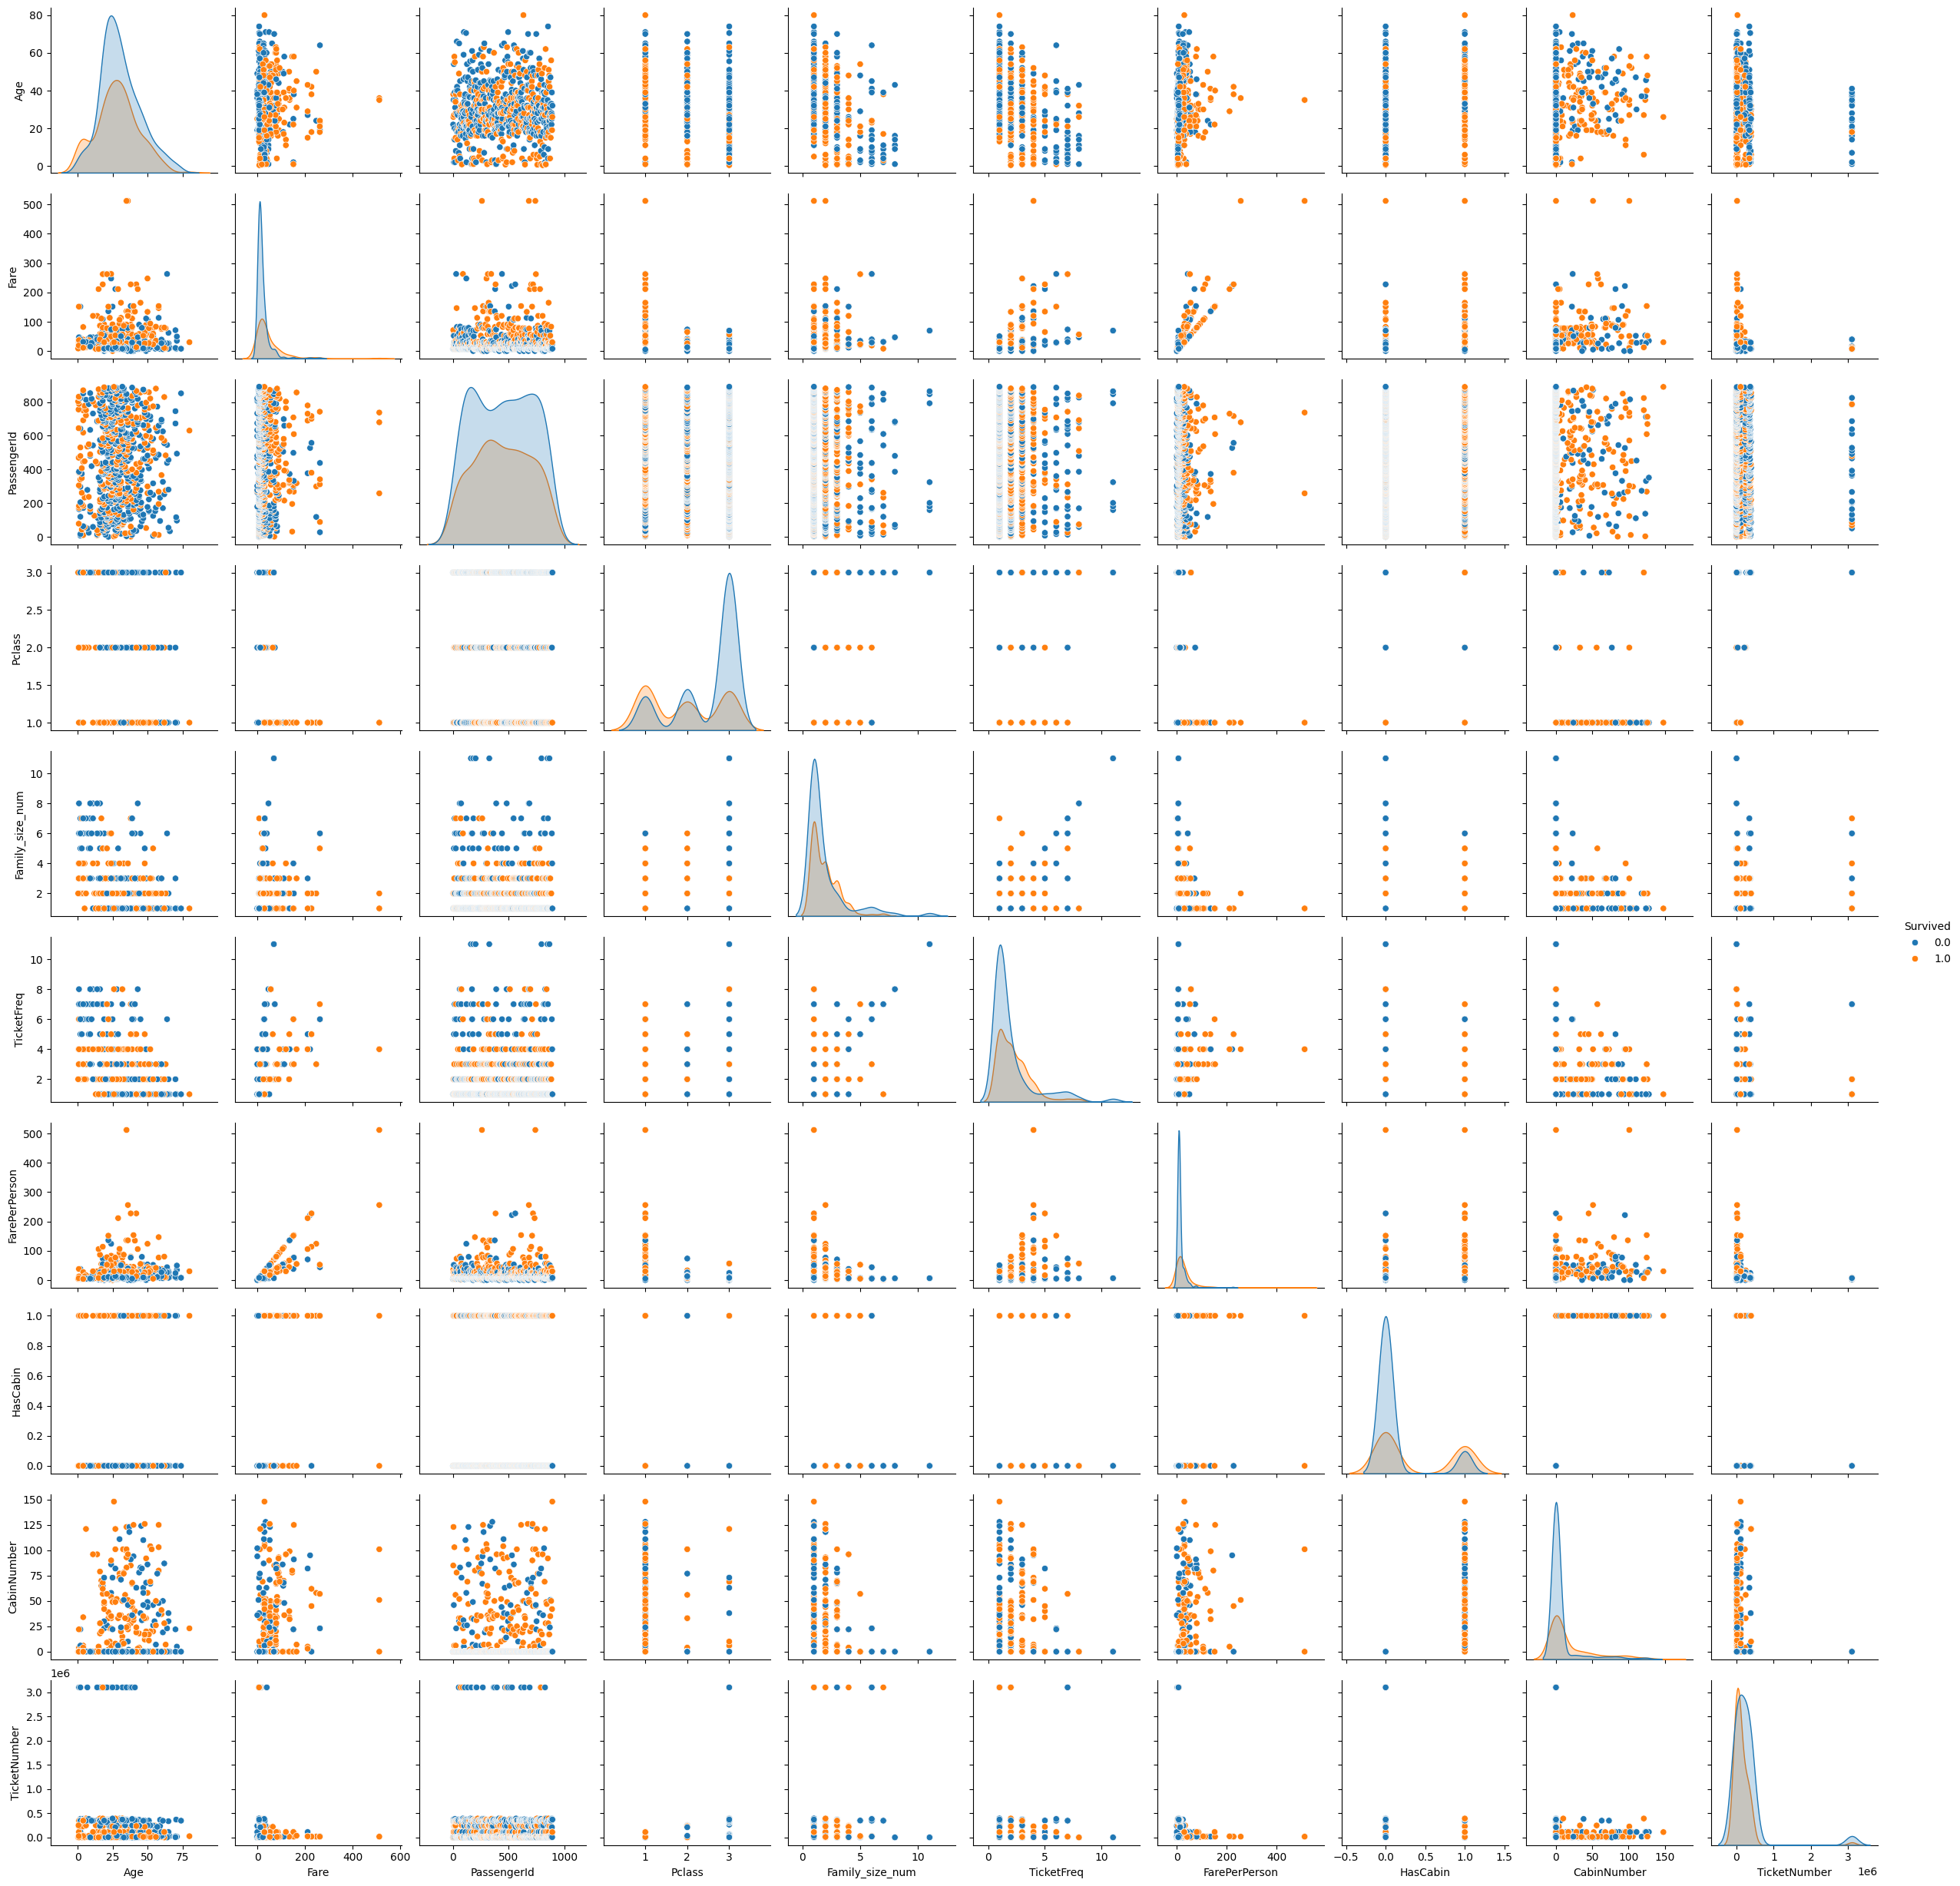

In [ ]:
sns.pairplot(df,hue='Survived')

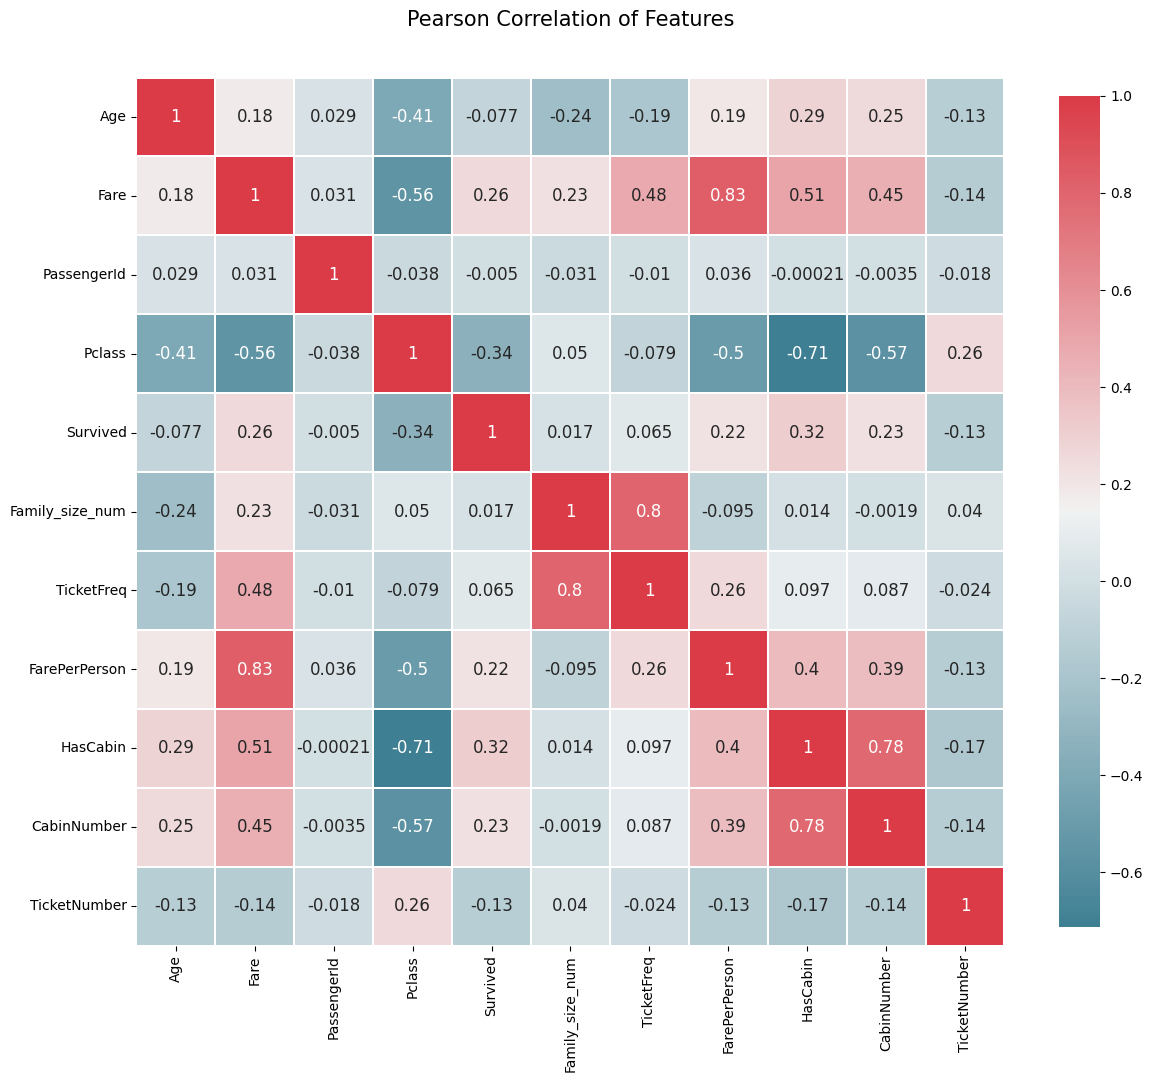

In [ ]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(numeric_only=True), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(df)


# Feature Engineering¶

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score
from sklearn import ensemble
from sklearn import gaussian_process
from sklearn import linear_model
from sklearn import naive_bayes
from sklearn import neighbors
from sklearn import svm
from sklearn import tree
from sklearn import discriminant_analysis
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score


In [ ]:
df.head()

,Age,Cabin,Deck,Embarked,Fare,PassengerId,Pclass,Sex,Survived,Ticket,...,TicketFreq,TicketGroup,FarePerPerson,Pclass_Sex,Pclass_Age,Sex_Age,HasCabin,CabinNumber,TicketNumber,TicketPrefix
0,22.0,NaN,U,S,7.2500,1,3,male,0.0,A/5 21171,...,1,Single,3.62500,3_male,3_Adult,male_Adult,0,0.0,5.0,A
1,38.0,C85,C,C,71.2833,2,1,female,1.0,PC 17599,...,2,Group,35.64165,1_female,1_Adult,female_Adult,1,85.0,17599.0,PC
2,26.0,NaN,U,S,7.9250,3,3,female,1.0,STON/O2. 3101282,...,1,Single,7.92500,3_female,3_Adult,female_Adult,0,0.0,2.0,STON
3,35.0,C123,C,S,53.1000,4,1,female,1.0,113803,...,2,Group,26.55000,1_female,1_Adult,female_Adult,1,123.0,113803.0,NUM
4,35.0,NaN,U,S,8.0500,5,3,male,0.0,373450,...,1,Single,8.05000,3_male,3_Adult,male_Adult,0,0.0,373450.0,NUM


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

temp_df = df.copy()

# Chuyển đổi categorical sang số
for col in ['Sex', 'Embarked', 'Deck', 'Title', 'TicketGroup', 'Pclass_Sex', 'Pclass_Age', 'Sex_Age', 'TicketPrefix']:
    temp_df[col] = pd.factorize(temp_df[col])[0]

# Tạo AgeGroup và FareGroup (using available Age/Fare; will update df later)
temp_df['AgeGroup'] = temp_df['Age'].apply(get_age_group)
temp_df['AgeGroup'] = pd.factorize(temp_df['AgeGroup'])[0]

temp_df['FareGroup'] = temp_df['Fare'].apply(get_fare_group)
temp_df['FareGroup'] = pd.factorize(temp_df['FareGroup'])[0]

# === ADD THESE: Engineer missing features ===
# Family_size_num (assuming this is numeric FamilySize: SibSp + Parch + 1)



# TicketFreq (frequency of Ticket value)
temp_df['TicketFreq'] = temp_df.groupby('Ticket')['Ticket'].transform('count')

# HasCabin (1 if Cabin not NaN, else 0)
temp_df['HasCabin'] = (temp_df['Cabin'].notna()).astype(int)

# FarePerPerson (Fare divided by Family_size_num, handle div-by-zero)
temp_df['FarePerPerson'] = temp_df['Fare'] / temp_df['Family_size_num'].replace(0, 1)

# Features để dự đoán Age (now all should exist; added NameLength and NameWords if needed)
features_for_age = ['Pclass', 'Fare', 'Family_size_num', 'TicketFreq', 'HasCabin', 
                   'Sex', 'Embarked', 'Deck', 'Title', 'TicketGroup', 
                   'Pclass_Sex', 'Pclass_Age', 'Sex_Age', 'TicketPrefix',
                   'FarePerPerson', 'NameLength', 'NameWords']  # Added the missing ones
# Filter to only existing columns
available_features = [f for f in features_for_age if f in temp_df.columns]
print("Using features:", available_features)  # Debug: see what's available

# Huấn luyện mô hình hồi quy
age_known = temp_df[temp_df['Age'].notna()]
age_unknown = temp_df[temp_df['Age'].isna()]

print(f"Known ages: {len(age_known)}, Unknown: {len(age_unknown)}")  # Debug

rfr = RandomForestRegressor(n_estimators=300, max_depth=12, min_samples_split=3, 
                           min_samples_leaf=1, random_state=42)
rfr.fit(age_known[available_features], age_known['Age'])

predicted_age = rfr.predict(age_unknown[available_features])
# Clip predictions
predicted_age = np.clip(predicted_age, 0, 100)
df.loc[df['Age'].isna(), 'Age'] = predicted_age

# Tạo AgeGroup và FareGroup sau khi đã điền Age
df['AgeGroup'] = df['Age'].apply(get_age_group)
df['FareGroup'] = df['Fare'].apply(get_fare_group)

print("Age imputation complete! No more NaNs in Age.")

Using features: ['Pclass', 'Fare', 'Family_size_num', 'TicketFreq', 'HasCabin', 'Sex', 'Embarked', 'Deck', 'Title', 'TicketGroup', 'Pclass_Sex', 'Pclass_Age', 'Sex_Age', 'TicketPrefix', 'FarePerPerson']
Known ages: 1046, Unknown: 263
Age imputation complete! No more NaNs in Age.


<h3 style="background-color: #111; padding: 15px; font: bold 22px arial; color: lightgreen; border: 2px solid lime; border-radius: 8px">
♠ Separating the Data into Train and Test Sets 🧪</h3>

**We will divide the data into training and testing sets to evaluate the model's performance.**


Chú ý
copy

In [ ]:
train = df.loc[:890]
test = df.loc[891:]

In [ ]:
test.head()

,Age,Cabin,Deck,Embarked,Fare,PassengerId,Pclass,Sex,Survived,Ticket,...,FarePerPerson,Pclass_Sex,Pclass_Age,Sex_Age,HasCabin,CabinNumber,TicketNumber,TicketPrefix,AgeGroup,FareGroup
891,34.5,NaN,NaN,Q,7.8292,892,3,male,NaN,330911,...,7.829200,3_male,3_Adult,male_Adult,0,0.0,330911.0,NUM,Adult,Low
892,47.0,NaN,NaN,S,7.0000,893,3,female,NaN,363272,...,3.500000,3_female,3_Adult,female_Adult,0,0.0,363272.0,NUM,Adult,Low
893,62.0,NaN,NaN,Q,9.6875,894,2,male,NaN,240276,...,9.687500,2_male,2_Adult,male_Adult,0,0.0,240276.0,NUM,Middle_Age,Medium
894,27.0,NaN,NaN,S,8.6625,895,3,male,NaN,315154,...,8.662500,3_male,3_Adult,male_Adult,0,0.0,315154.0,NUM,Young_Adult,Medium
895,22.0,NaN,NaN,S,12.2875,896,3,female,NaN,3101298,...,4.095833,3_female,3_Adult,female_Adult,0,0.0,3101298.0,NUM,Young_Adult,Medium


In [ ]:
test.drop(columns=['Survived'],inplace=True)

In [ ]:
train['Survived'] = train['Survived'].astype('int64')

In [ ]:
train = train.drop("PassengerId", axis=1)

In [ ]:
X_train = train.drop("Survived", axis=1)
y_train = train["Survived"]

In [ ]:
X_train.head()

,Age,Cabin,Deck,Embarked,Fare,Pclass,Sex,Ticket,Title,Family_size_num,...,FarePerPerson,Pclass_Sex,Pclass_Age,Sex_Age,HasCabin,CabinNumber,TicketNumber,TicketPrefix,AgeGroup,FareGroup
0,22.0,NaN,U,S,7.2500,3,male,A/5 21171,Mr,2,...,3.62500,3_male,3_Adult,male_Adult,0,0.0,5.0,A,Young_Adult,Low
1,38.0,C85,C,C,71.2833,1,female,PC 17599,Mrs,2,...,35.64165,1_female,1_Adult,female_Adult,1,85.0,17599.0,PC,Adult,Very_High
2,26.0,NaN,U,S,7.9250,3,female,STON/O2. 3101282,Miss,1,...,7.92500,3_female,3_Adult,female_Adult,0,0.0,2.0,STON,Young_Adult,Medium
3,35.0,C123,C,S,53.1000,1,female,113803,Mrs,2,...,26.55000,1_female,1_Adult,female_Adult,1,123.0,113803.0,NUM,Adult,Very_High
4,35.0,NaN,U,S,8.0500,3,male,373450,Mr,1,...,8.05000,3_male,3_Adult,male_Adult,0,0.0,373450.0,NUM,Adult,Medium


In [ ]:
test.head()

,Age,Cabin,Deck,Embarked,Fare,PassengerId,Pclass,Sex,Ticket,Title,...,FarePerPerson,Pclass_Sex,Pclass_Age,Sex_Age,HasCabin,CabinNumber,TicketNumber,TicketPrefix,AgeGroup,FareGroup
891,34.5,NaN,NaN,Q,7.8292,892,3,male,330911,Mr,...,7.829200,3_male,3_Adult,male_Adult,0,0.0,330911.0,NUM,Adult,Low
892,47.0,NaN,NaN,S,7.0000,893,3,female,363272,Mrs,...,3.500000,3_female,3_Adult,female_Adult,0,0.0,363272.0,NUM,Adult,Low
893,62.0,NaN,NaN,Q,9.6875,894,2,male,240276,Mr,...,9.687500,2_male,2_Adult,male_Adult,0,0.0,240276.0,NUM,Middle_Age,Medium
894,27.0,NaN,NaN,S,8.6625,895,3,male,315154,Mr,...,8.662500,3_male,3_Adult,male_Adult,0,0.0,315154.0,NUM,Young_Adult,Medium
895,22.0,NaN,NaN,S,12.2875,896,3,female,3101298,Mrs,...,4.095833,3_female,3_Adult,female_Adult,0,0.0,3101298.0,NUM,Young_Adult,Medium


In [ ]:
X_train.shape,y_train.shape

((891, 23), (891,))

<h3 style="background-color: #111; padding: 15px; font: bold 22px arial; color: lightgreen; border: 2px solid lime; border-radius: 8px">
♠ Creating a Pipeline with Column Transformer 🔄</h3>

**We will build a pipeline that incorporates a Column Transformer to streamline preprocessing and feature engineering.**


In [ ]:
num_cat_tranformation = ColumnTransformer([
    ('scaling', MinMaxScaler(), ['Age', 'Fare']),
    ('onehotencolding1', OneHotEncoder(), ['Pclass', 'Sex']),
    ('onehotencolding2', OneHotEncoder(), ['Embarked', 'Title', 'Family_size'])
], remainder='passthrough')

In [ ]:
bins=ColumnTransformer([
                        ('Kbins',KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile'),[0,2]),
                        ],remainder='passthrough')

In [ ]:
from sklearn import set_config
set_config(display='diagram')

In [ ]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test=train_test_split(X_train,y_train,test_size=0.2)
X_train, X_test, y_train, y_test=train_test_split(X_train,y_train,test_size=0.2)

In [ ]:
import xgboost as xgb
import pandas as pd
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

# Bước 1: Factorize TẤT CẢ cột categorical sang số (trước pipeline)
print("Dtypes trước factorize:")
print(X_train.dtypes)

categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()
print(f"Cột categorical cần factorize: {categorical_cols}")

for col in categorical_cols:
    # Factorize train
    train_codes, train_categories = pd.factorize(X_train[col])
    X_train[col] = train_codes
    
    # Mapping cho test (sử dụng categories từ train để nhất quán)
    mapping = dict(zip(train_categories, range(len(train_categories))))
    X_test[col] = X_test[col].map(mapping).fillna(-1).astype(int)  # -1 cho unknown

print("\nDtypes sau factorize:")
print(X_train.dtypes)
print("Sample X_train['Family_size']:", X_train['Family_size'].head())  # Nên là số, e.g., 0 cho 'Single'

# Bước 2: Đơn giản hóa ColumnTransformer (chỉ scale num, passthrough hết vì toàn số)
num_cat_tranformation = ColumnTransformer(
    transformers=[
        ('scaling', MinMaxScaler(), ['Age', 'Fare'])  # Chỉ numerical
    ],
    remainder='passthrough'  # An toàn vì không còn string
)

# Các classifier (giữ nguyên, thêm eval_metric cho XGB nếu cần)
xgb_clf = xgb.XGBClassifier(random_state=42, n_estimators=500, max_depth=5, n_jobs=-1)
rf_clf = RandomForestClassifier(n_estimators=500, max_depth=8, random_state=42, n_jobs=-1)
lr_clf = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')

# Ensemble
ensemble = VotingClassifier(
    estimators=[('xgb', xgb_clf), ('rf', rf_clf), ('lr', lr_clf)],
    voting='soft'
)

# Pipeline
pipe_ensemble = Pipeline([
    ('num_cat_tranformation', num_cat_tranformation),
    ('classifier', ensemble)
])

# Fit và predict
pipe_ensemble.fit(X_train, y_train)
y_pred_ens = pipe_ensemble.predict(X_test)

# Đánh giá
print("Ensemble accuracy:", accuracy_score(y_test, y_pred_ens))
y_pred_train_ens = pipe_ensemble.predict(X_train)
print("Ensemble train accuracy:", accuracy_score(y_train, y_pred_train_ens))

Dtypes trước factorize:
Age                float64
Cabin               object
Deck                object
Embarked            object
Fare               float64
Pclass               int64
Sex                 object
Ticket              object
Title               object
Family_size_num      int64
Family_size         object
TicketFreq           int64
TicketGroup         object
FarePerPerson      float64
Pclass_Sex          object
Pclass_Age          object
Sex_Age             object
HasCabin             int64
CabinNumber        float64
TicketNumber       float64
TicketPrefix        object
AgeGroup            object
FareGroup           object
dtype: object
Cột categorical cần factorize: ['Cabin', 'Deck', 'Embarked', 'Sex', 'Ticket', 'Title', 'Family_size', 'TicketGroup', 'Pclass_Sex', 'Pclass_Age', 'Sex_Age', 'TicketPrefix', 'AgeGroup', 'FareGroup']

Dtypes sau factorize:
Age                float64
Cabin                int64
Deck                 int64
Embarked             int64
Fare         

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score
import xgboost as xgb

# Giả sử pipe_ensemble đã định nghĩa như trước (với num_cat_tranformation và ensemble)

# Param grid cho từng estimator (nhỏ để nhanh; mở rộng sau)
param_grid = {
    'classifier__xgb__n_estimators': [300, 500],
    'classifier__xgb__max_depth': [3, 5],
    'classifier__rf__n_estimators': [300, 500],
    'classifier__rf__max_depth': [6, 8],
    'classifier__lr__C': [0.1, 1.0, 10.0]  # Inverse regularization cho LR
}

# GridSearchCV (hoặc RandomizedSearchCV(n_iter=20) để nhanh hơn)
grid_search = GridSearchCV(
    pipe_ensemble, 
    param_grid, 
    cv=5,  # 5-fold CV
    scoring='accuracy',
    n_jobs=-1,  # Song song
    verbose=1
)

# Fit trên train
grid_search.fit(X_train, y_train)

# Kết quả
print("Tham số tốt nhất:", grid_search.best_params_)
print("Điểm CV tốt nhất:", grid_search.best_score_)

# Model tối ưu
best_ensemble = grid_search.best_estimator_

# Đánh giá
y_pred_opt = best_ensemble.predict(X_test)
print("Test accuracy tối ưu:", accuracy_score(y_test, y_pred_opt))

y_pred_train_opt = best_ensemble.predict(X_train)
print("Train accuracy tối ưu:", accuracy_score(y_train, y_pred_train_opt))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Tham số tốt nhất: {'classifier__lr__C': 1.0, 'classifier__rf__max_depth': 8, 'classifier__rf__n_estimators': 300, 'classifier__xgb__max_depth': 5, 'classifier__xgb__n_estimators': 500}
Điểm CV tốt nhất: 0.8440756426671919
Test accuracy tối ưu: 0.7988826815642458
Train accuracy tối ưu: 0.9676966292134831


In [ ]:
def create_pipeline(algo):
    return Pipeline([
        ('num_cat_transformation', num_cat_tranformation),
        ('bins', bins),
        ('classifier', algo)
    ])

# Model Training

<h3 style="background-color: #111; padding: 15px; font: bold 22px arial; color: lightgreen; border: 2px solid lime; border-radius: 8px">
♠ Evaluating Various Machine Learning Models to Find the Best Performer 🤖</h3>

**We will test different machine learning models to identify which one provides the best performance for our data.**


In [ ]:
from sklearn import ensemble
algorithms=[
    # Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    # Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    # GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    # Naive Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    # Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    # SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    # Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    # Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),
    
    # XGBoost
    XGBClassifier()
]

In [ ]:
model_names = []
CV_Accuracy=[]
for algo in algorithms:
    pipeline = create_pipeline(algo)
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    model_names.append(algo.__class__.__name__)
    CV_Accuracy.append(scores.mean())
    
#     print(f'Model: {algo.__class__.__name__}, CV Accuracy: {scores.mean()}')
#     print('\n')

In [ ]:
model_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': CV_Accuracy})

In [ ]:
model_df.sort_values(by='Accuracy', ascending=False, inplace=True)

<h3 style="background-color: #111; padding: 15px; font: bold 22px arial; color: lightgreen; border: 2px solid lime; border-radius: 8px">
♠ Tuning the Top 3 Machine Learning Models for Better Results 🔧</h3>

**We will focus on tuning the top 3 performing models from our data frame to enhance their performance and achieve better results.**


In [ ]:
model_df

,Model,Accuracy
4,RandomForestClassifier,0.846893
2,ExtraTreesClassifier,0.834256
3,GradientBoostingClassifier,0.831498
21,XGBClassifier,0.811770
8,RidgeClassifierCV,0.809032
19,LinearDiscriminantAnalysis,0.809022
0,AdaBoostClassifier,0.808973
1,BaggingClassifier,0.799163
6,LogisticRegressionCV,0.792130
11,BernoulliNB,0.778085


In [ ]:
algo1 = ensemble.RandomForestClassifier(
    criterion='gini',
    n_estimators=1750,
    max_depth=7,
    min_samples_split=6,
    min_samples_leaf=6,
    max_features='sqrt',  # Sửa ở đây
    oob_score=True,
    random_state=42,
    n_jobs=-1,
    verbose=1
)


algo2 = ensemble.GradientBoostingClassifier(
    max_depth=3,          # tăng depth để học tốt hơn
    n_estimators=150,     # đủ cây để mô hình học
    max_features='sqrt',  # hoặc None
    random_state=42
)
algo3 = linear_model.RidgeClassifierCV()


In [ ]:
df.head()

,Age,Cabin,Deck,Embarked,Fare,PassengerId,Pclass,Sex,Survived,Ticket,...,FarePerPerson,Pclass_Sex,Pclass_Age,Sex_Age,HasCabin,CabinNumber,TicketNumber,TicketPrefix,AgeGroup,FareGroup
0,22.0,NaN,U,S,7.2500,1,3,male,0.0,A/5 21171,...,3.62500,3_male,3_Adult,male_Adult,0,0.0,5.0,A,Young_Adult,Low
1,38.0,C85,C,C,71.2833,2,1,female,1.0,PC 17599,...,35.64165,1_female,1_Adult,female_Adult,1,85.0,17599.0,PC,Adult,Very_High
2,26.0,NaN,U,S,7.9250,3,3,female,1.0,STON/O2. 3101282,...,7.92500,3_female,3_Adult,female_Adult,0,0.0,2.0,STON,Young_Adult,Medium
3,35.0,C123,C,S,53.1000,4,1,female,1.0,113803,...,26.55000,1_female,1_Adult,female_Adult,1,123.0,113803.0,NUM,Adult,Very_High
4,35.0,NaN,U,S,8.0500,5,3,male,0.0,373450,...,8.05000,3_male,3_Adult,male_Adult,0,0.0,373450.0,NUM,Adult,Medium


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline  # Nếu chưa có

# Giả sử bạn đã có num_cat_tranformation, bins như trước
# X_full, y_full, test_processed đã chuẩn bị đúng pipeline

# Tạo pipelines cho từng algo (fit preprocess chung)
pipe1 = Pipeline([
    ('num_cat_tranformation', num_cat_tranformation),
    ('bins', bins),
    ('classifier', algo1)
])

pipe2 = Pipeline([
    ('num_cat_tranformation', num_cat_tranformation),
    ('bins', bins),
    ('classifier', algo2)
])

pipe3 = Pipeline([
    ('num_cat_tranformation', num_cat_tranformation),
    ('bins', bins),
    ('classifier', algo3)
])

# Ensemble: Soft voting (dùng probabilities)
ensemble = VotingClassifier([
    ('rf', pipe1),
    ('gbc', pipe2),
    ('ridge', pipe3)
], voting='soft', n_jobs=-1)

# Cross-validation trên toàn bộ train
from sklearn.model_selection import cross_val_score
cv_ensemble = cross_val_score(ensemble, X_train, y_train, cv=5, scoring='accuracy')
print(f"Ensemble CV Accuracy: {cv_ensemble.mean():.4f} (+/- {cv_ensemble.std() * 2:.4f})")



[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 1226 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 1750 out of 1750 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 1226 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 1750 out of 1750 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concur

Ensemble CV Accuracy: nan (+/- nan)


In [ ]:
print(X_train.dtypes)
print(X_train.head())

Age                float64
Cabin                int64
Deck                 int64
Embarked             int64
Fare               float64
Pclass               int64
Sex                  int64
Ticket               int64
Title                int64
Family_size_num      int64
Family_size          int64
TicketFreq           int64
TicketGroup          int64
FarePerPerson      float64
Pclass_Sex           int64
Pclass_Age           int64
Sex_Age              int64
HasCabin             int64
CabinNumber        float64
TicketNumber       float64
TicketPrefix         int64
AgeGroup             int64
FareGroup            int64
dtype: object
      Age  Cabin  Deck  Embarked  Fare  Pclass  Sex  Ticket  Title  \
167  45.0     -1     0         0  27.9       3    0       0      0   
723  50.0     -1     0         0  13.0       2    1       1      1   
219  30.0     -1     0         0  10.5       2    1       2      1   
81   29.0     -1     0         0   9.5       3    1       3      1   
336  29.0      

In [ ]:
print(X_train.isnull().sum())

Age                0
Cabin              0
Deck               0
Embarked           0
Fare               0
Pclass             0
Sex                0
Ticket             0
Title              0
Family_size_num    0
Family_size        0
TicketFreq         0
TicketGroup        0
FarePerPerson      0
Pclass_Sex         0
Pclass_Age         0
Sex_Age            0
HasCabin           0
CabinNumber        0
TicketNumber       0
TicketPrefix       0
AgeGroup           0
FareGroup          0
dtype: int64


In [ ]:
# ...existing code...
X_train['Family_size'] = X_train['Family_size'].astype('category')
X_test['Family_size'] = X_test['Family_size'].astype('category')
# ...existing code...

In [ ]:
pipe1.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    2.3s finished


,steps,"[('num_cat_tranformation', ...), ('bins', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('scaling', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [ ]:
# ...existing code...
y_pred = pipe1.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
# ...existing code...
# ...existing code...
y_pred_train = pipe1.predict(X_train)
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
# ...existing code...

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 1226 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 1750 out of 1750 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.1s


Test Accuracy: 0.7988826815642458


[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 1226 tasks      | elapsed:    0.3s


Train Accuracy: 0.8834269662921348


[Parallel(n_jobs=12)]: Done 1750 out of 1750 | elapsed:    0.4s finished


In [ ]:
# Optimized preprocessing + modeling for higher Kaggle accuracy
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# 1) Prepare train/test split from unified df already built above
full_train = df.loc[:890].copy()
full_test = df.loc[891:].copy()

y = full_train['Survived'].astype(int)
X = full_train.drop(columns=['Survived', 'PassengerId'])
X_test_final = full_test.drop(columns=['Survived'])  # keep PassengerId for submission

# Ensure Age has no NaNs (prior cell imputed); also fill any residual NaNs robustly inside pipeline
# Identify feature types
numeric_features = ['Age','Fare','Family_size_num','TicketFreq','FarePerPerson','HasCabin','CabinNumber','TicketNumber','Pclass']
# Some engineered numeric encoded earlier might still be numeric; keep conservative list and passthrough others
categorical_features = ['Sex','Embarked','Deck','Title','Family_size','TicketGroup','Pclass_Sex','Pclass_Age','Sex_Age','TicketPrefix','AgeGroup','FareGroup','Ticket']

numeric_in_X = [c for c in numeric_features if c in X.columns]
categorical_in_X = [c for c in categorical_features if c in X.columns]

preprocess = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_in_X),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=True))
        ]), categorical_in_X)
    ],
    remainder='drop'
)

# 2) Two strong models
rf = RandomForestClassifier(
    n_estimators=600,
    max_depth=8,
    min_samples_split=6,
    min_samples_leaf=3,
    max_features='sqrt',
    n_jobs=-1,
    random_state=42
)

xgb_clf = xgb.XGBClassifier(
    n_estimators=700,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.8,
    reg_alpha=0.0,
    reg_lambda=1.0,
    n_jobs=-1,
    random_state=42,
    tree_method='hist',
    eval_metric='logloss'
)

pipe_rf = Pipeline([
    ('preprocess', preprocess),
    ('model', rf)
])

pipe_xgb = Pipeline([
    ('preprocess', preprocess),
    ('model', xgb_clf)
])

# 3) Robust CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf_cv = cross_val_score(pipe_rf, X, y, cv=cv, scoring='accuracy', n_jobs=-1)
xgb_cv = cross_val_score(pipe_xgb, X, y, cv=cv, scoring='accuracy', n_jobs=-1)
print(f"RF CV acc: {rf_cv.mean():.4f} (+/- {rf_cv.std()*2:.4f})")
print(f"XGB CV acc: {xgb_cv.mean():.4f} (+/- {xgb_cv.std()*2:.4f})")

# 4) Choose best by CV and fit on full training
best_pipe = pipe_xgb if xgb_cv.mean() >= rf_cv.mean() else pipe_rf
best_pipe.fit(X, y)

# 5) Predict test and save submission
X_submit = X_test_final.drop(columns=['PassengerId']) if 'PassengerId' in X_test_final.columns else X_test_final
pred_test = best_pipe.predict(X_submit)

sub_df = pd.DataFrame({
    'PassengerId': full_test['PassengerId'],
    'Survived': pred_test.astype(int)
})
sub_path = 'submission_fixed.csv'
sub_df.to_csv(sub_path, index=False)
print(f"Saved submission to {sub_path}")


In [ ]:
submission = pd.DataFrame()
submission["PassengerId"] = test["PassengerId"]
submission

,PassengerId
891,892
892,893
893,894
894,895
895,896
...,...
1304,1305
1305,1306
1306,1307
1307,1308


In [ ]:
test = test.drop("PassengerId", axis=1)
test.head()

,Age,Cabin,Deck,Embarked,Fare,Pclass,Sex,Ticket,Title,Family_size_num,...,FarePerPerson,Pclass_Sex,Pclass_Age,Sex_Age,HasCabin,CabinNumber,TicketNumber,TicketPrefix,AgeGroup,FareGroup
891,34.5,NaN,NaN,Q,7.8292,3,male,330911,Mr,1,...,7.829200,3_male,3_Adult,male_Adult,0,0.0,330911.0,NUM,Adult,Low
892,47.0,NaN,NaN,S,7.0000,3,female,363272,Mrs,2,...,3.500000,3_female,3_Adult,female_Adult,0,0.0,363272.0,NUM,Adult,Low
893,62.0,NaN,NaN,Q,9.6875,2,male,240276,Mr,1,...,9.687500,2_male,2_Adult,male_Adult,0,0.0,240276.0,NUM,Middle_Age,Medium
894,27.0,NaN,NaN,S,8.6625,3,male,315154,Mr,1,...,8.662500,3_male,3_Adult,male_Adult,0,0.0,315154.0,NUM,Young_Adult,Medium
895,22.0,NaN,NaN,S,12.2875,3,female,3101298,Mrs,3,...,4.095833,3_female,3_Adult,female_Adult,0,0.0,3101298.0,NUM,Young_Adult,Medium


In [ ]:
import pandas as pd

# Bước 1: Kiểm tra và factorize categorical trên test (chỉ string/object)
print("Dtypes của test trước factorize:")
print(test.dtypes)

categorical_cols_test = test.select_dtypes(include=['object']).columns.tolist()
print(f"Cột categorical trên test cần factorize: {categorical_cols_test}")

# Lấy mapping từ train (giả sử bạn đã factorize train trước đó; nếu không, dùng factorize riêng)
# Nếu train đã factorize, dùng mapping từ train để nhất quán
# Giả sử bạn có 'train_factorized' hoặc mapping dict; nếu không, factorize test riêng
for col in categorical_cols_test:
    # Factorize test riêng nếu chưa có mapping (an toàn cho submission)
    test[col] = pd.factorize(test[col])[0].astype(int)
    print(f"Đã factorize '{col}' trên test.")

print("\nDtypes của test sau factorize:")
print(test.dtypes)
print("Sample test['Family_size']:", test['Family_size'].head())  # Nên là số, e.g., 0

# Bước 2: Dự đoán với pipeline (bây giờ an toàn)
predictions = pipe1.predict(test)

# Bước 3: Tạo và lưu submission
submission = pd.DataFrame({'PassengerId': test_ids, 'Survived': predictions})  # test_ids từ trước
submission.to_csv("submission9999.csv", index=False)

print("Submission lưu thành công! Kiểm tra file 'submission1111.csv'.")
print("Sample submission:")
print(submission.head())

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.


Dtypes của test trước factorize:
Age                float64
Cabin               object
Deck                object
Embarked            object
Fare               float64
Pclass               int64
Sex                 object
Ticket              object
Title               object
Family_size_num      int64
Family_size         object
TicketFreq           int64
TicketGroup         object
FarePerPerson      float64
Pclass_Sex          object
Pclass_Age          object
Sex_Age             object
HasCabin             int64
CabinNumber        float64
TicketNumber       float64
TicketPrefix        object
AgeGroup            object
FareGroup           object
dtype: object
Cột categorical trên test cần factorize: ['Cabin', 'Deck', 'Embarked', 'Sex', 'Ticket', 'Title', 'Family_size', 'TicketGroup', 'Pclass_Sex', 'Pclass_Age', 'Sex_Age', 'TicketPrefix', 'AgeGroup', 'FareGroup']
Đã factorize 'Cabin' trên test.
Đã factorize 'Deck' trên test.
Đã factorize 'Embarked' trên test.
Đã factorize 'Sex' trên tes

[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 1226 tasks      | elapsed:    0.3s


Submission lưu thành công! Kiểm tra file 'submission1111.csv'.
Sample submission:
   PassengerId  Survived
0          892         0
1          893         0
2          894         1
3          895         1
4          896         0


[Parallel(n_jobs=12)]: Done 1750 out of 1750 | elapsed:    0.4s finished
